## 1. load packages

In [1]:
library(speckle)
library(limma)
library(ggplot2)
library(ggpubr)
library(rstatix)
library(dplyr)
library(tidyr)



Attaching package: ‘rstatix’


The following object is masked from ‘package:stats’:

    filter



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




## 2. Load data

In [2]:
meta <- read.table('/data/leuven/351/vsc35107/lustre1_stt/database/metadata/atac_metadata_cleaned.csv', sep=',', head=TRUE)

In [2]:
head(meta)

,X,subject,SampID,region,age_death,msex,pmi,ADdiag2types,ADdiag3types,min_frag,num_cell
,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>
1,0,ROSMAP-86126,D19-122585,EC,86,Male,6,AD,earlyAD,1084,156
2,1,ROSMAP-50941,D19-122586,EC,89,Female,7,AD,lateAD,1000,120
3,2,ROSMAP-32686,D19-122587,EC,80,Female,6,AD,earlyAD,1076,131
4,3,ROSMAP-67634,D19-122588,EC,92,Male,7,nonAD,nonAD,1351,79
5,4,ROSMAP-79151,D19-122589,EC,76,Male,6,AD,lateAD,1553,15
6,5,ROSMAP-52212,D19-122590,EC,88,Male,6,nonAD,nonAD,4138,7


In [3]:
table(meta$ADdiag2types)


   AD nonAD 
  136   154 

In [26]:
dim(meta)

[1] 290  11

In [4]:
str(meta)

'data.frame':	290 obs. of  11 variables:
 $ X           : int  0 1 2 3 4 5 6 7 8 9 ...
 $ subject     : chr  "ROSMAP-86126" "ROSMAP-50941" "ROSMAP-32686" "ROSMAP-67634" ...
 $ SampID      : chr  "D19-122585" "D19-122586" "D19-122587" "D19-122588" ...
 $ region      : chr  "EC" "EC" "EC" "EC" ...
 $ age_death   : int  86 89 80 92 76 88 84 77 89 88 ...
 $ msex        : chr  "Male" "Female" "Female" "Male" ...
 $ pmi         : int  6 7 6 7 6 6 6 6 5 5 ...
 $ ADdiag2types: chr  "AD" "AD" "AD" "nonAD" ...
 $ ADdiag3types: chr  "earlyAD" "lateAD" "earlyAD" "nonAD" ...
 $ min_frag    : num  1084 1000 1076 1351 1553 ...
 $ num_cell    : num  156 120 131 79 15 7 4 119 204 182 ...


In [5]:
n_distinct(meta$SampID)

[1] 290

In [29]:
head(meta)

,X,subject,SampID,region,age_death,msex,pmi,ADdiag2types,ADdiag3types,min_frag,num_cell
,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<int>,<int>
1,0,ROSMAP-86126,D19-122585,EC,86,Male,6,AD,earlyAD,1084,156
2,1,ROSMAP-50941,D19-122586,EC,89,Female,7,AD,lateAD,1000,120
3,2,ROSMAP-32686,D19-122587,EC,80,Female,6,AD,earlyAD,1076,131
4,3,ROSMAP-67634,D19-122588,EC,92,Male,7,nonAD,nonAD,1351,79
5,4,ROSMAP-79151,D19-122589,EC,76,Male,6,AD,lateAD,1553,15
6,5,ROSMAP-52212,D19-122590,EC,88,Male,6,nonAD,nonAD,4138,7


## 3. Significance test

In [7]:
stat.test <- meta %>%
  t_test(age_death ~ ADdiag2types) %>%
  add_significance()
stat.test

.y.,group1,group2,n1,n2,statistic,df,p,p.signif
<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<chr>
age_death,AD,nonAD,136,154,0.6272657,283.4995,0.531,ns


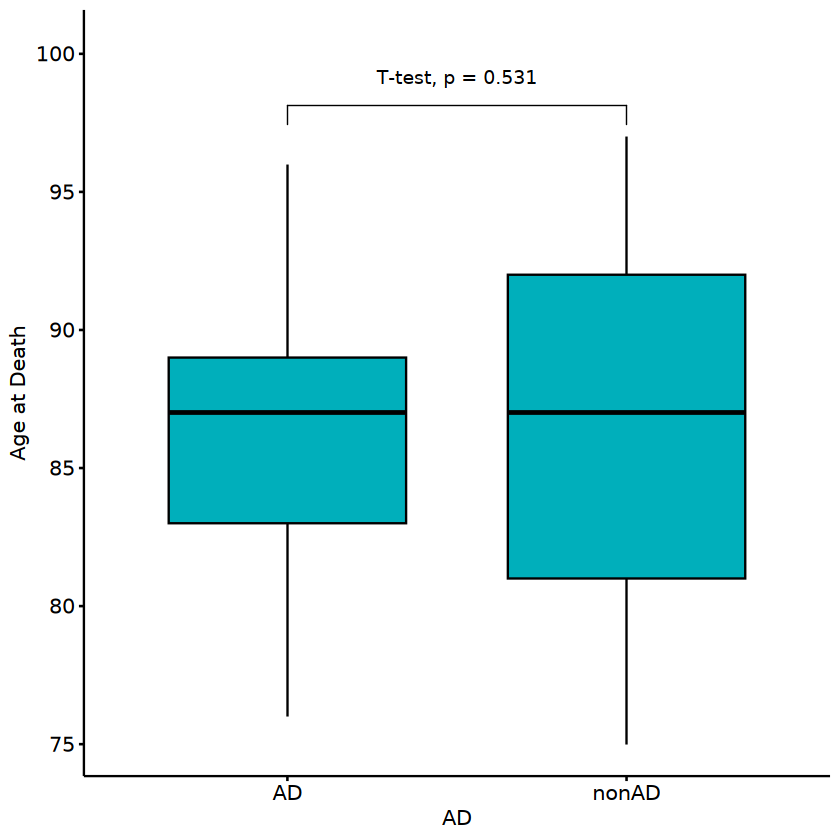

In [8]:
bxp <- ggboxplot(meta, x = "ADdiag2types", y = "age_death", fill = "#00AFBB")
stat.test <- stat.test %>% add_xy_position(x = "ADdiag2types")
bxp + stat_pvalue_manual(
  stat.test, label = "T-test, p = {p}",
  vjust = -1, bracket.nudge.y = 1
  ) +
  scale_y_continuous(expand = expansion(mult = c(0.05, 0.15)))+
  xlab("AD") +  
  ylab("Age at Death")  

.y.,group1,group2,n1,n2,statistic,df,p,p.signif
<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<chr>
pmi,AD,nonAD,136,154,-0.6403755,277.5998,0.522,ns


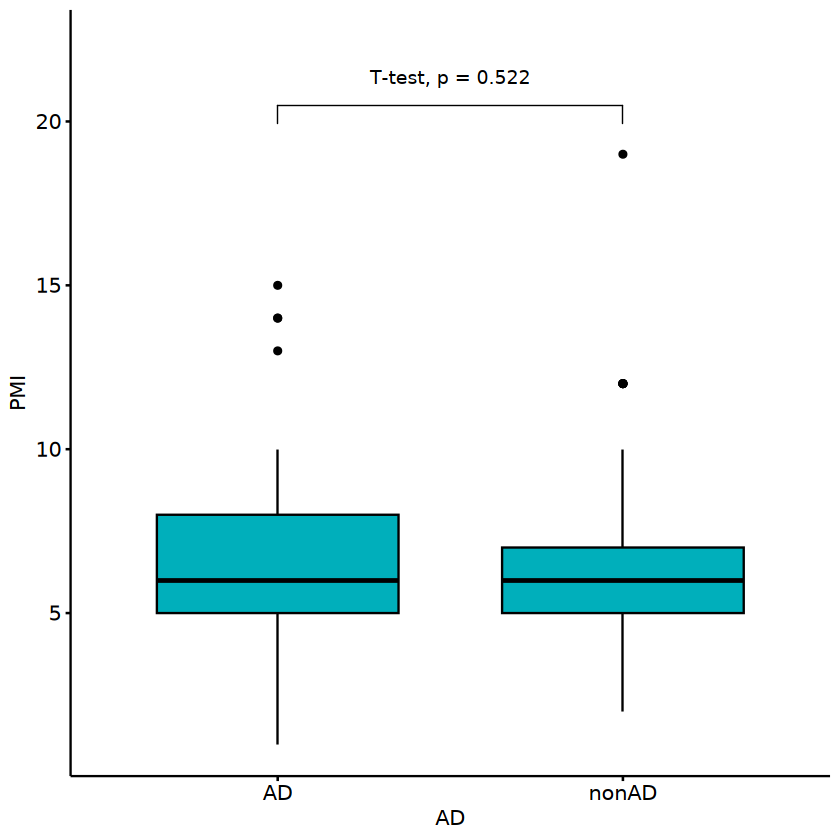

In [9]:
stat.test <- meta %>%
  t_test(pmi ~ ADdiag2types) %>%
  add_significance()
stat.test
bxp <- ggboxplot(meta, x = "ADdiag2types", y = "pmi", fill = "#00AFBB")
stat.test <- stat.test %>% add_xy_position(x = "ADdiag2types")
bxp + stat_pvalue_manual(
  stat.test, label = "T-test, p = {p}",
  vjust = -1, bracket.nudge.y = 1
  ) +
  scale_y_continuous(expand = expansion(mult = c(0.05, 0.15)))+
  xlab("AD") +  
  ylab("PMI")  

.y.,group1,group2,n1,n2,statistic,df,p,p.signif
<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<chr>
min_frag,AD,nonAD,136,154,1.363083,214.5577,0.174,ns


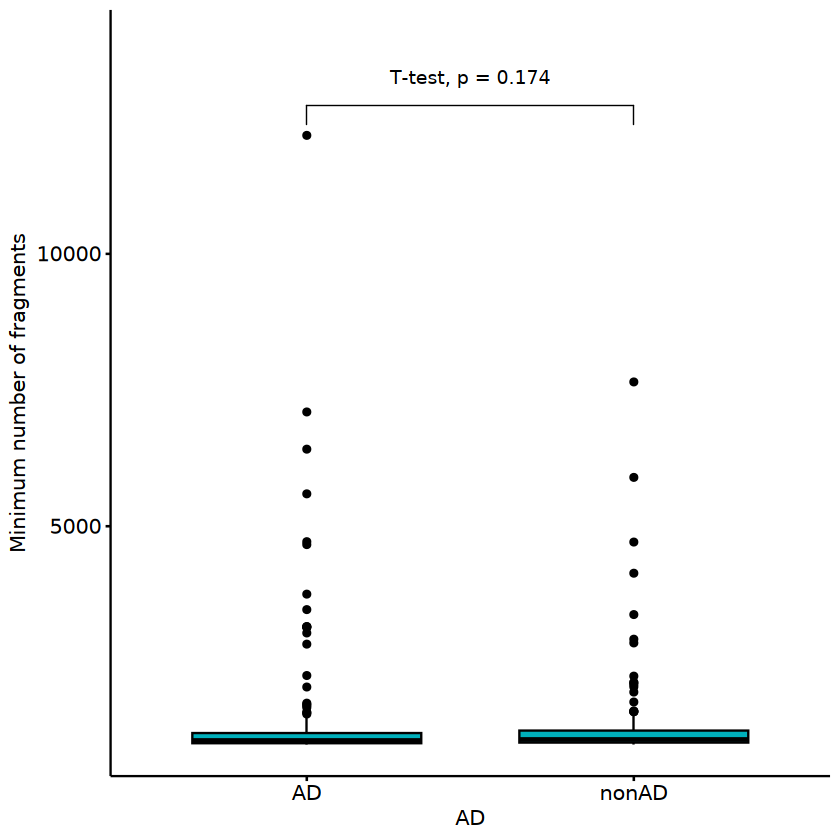

In [10]:
stat.test <- meta %>%
  t_test(min_frag ~ ADdiag2types) %>%
  add_significance()
stat.test
bxp <- ggboxplot(meta, x = "ADdiag2types", y = "min_frag", fill = "#00AFBB")
stat.test <- stat.test %>% add_xy_position(x = "ADdiag2types")
bxp + stat_pvalue_manual(
  stat.test, label = "T-test, p = {p}",
  vjust = -1, bracket.nudge.y = 1
  ) +
  scale_y_continuous(expand = expansion(mult = c(0.05, 0.15)))+
  xlab("AD") +  
  ylab("Minimum number of fragments")  

.y.,group1,group2,n1,n2,statistic,df,p,p.signif
<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<chr>
num_cell,AD,nonAD,136,154,-2.223462,274.4195,0.027,*


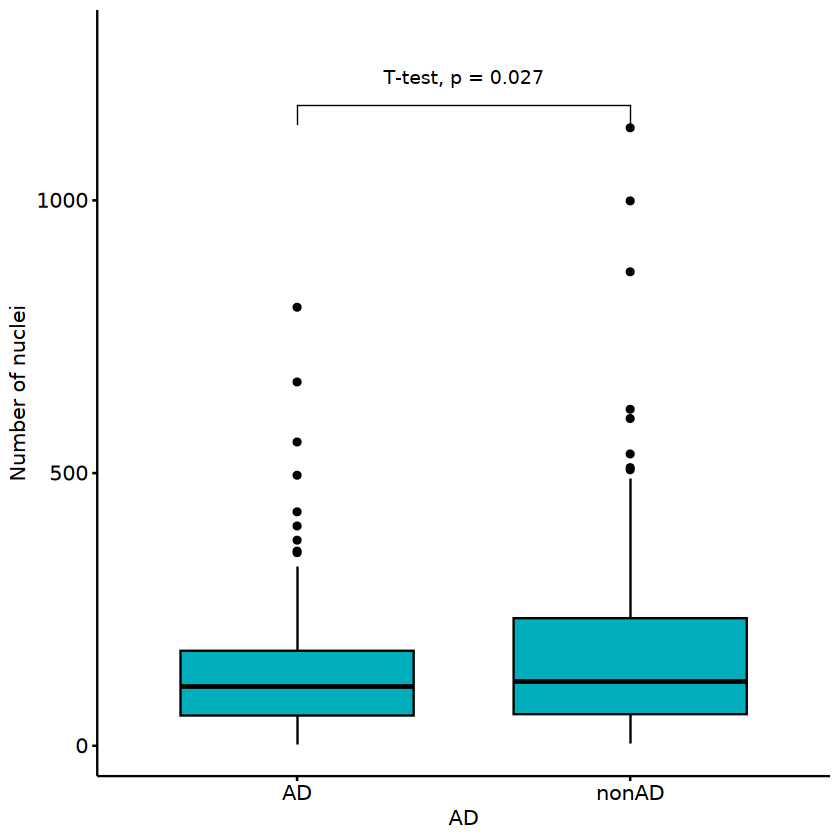

In [11]:
stat.test <- meta %>%
  t_test(num_cell ~ ADdiag2types) %>%
  add_significance()
stat.test
bxp <- ggboxplot(meta, x = "ADdiag2types", y = "num_cell", fill = "#00AFBB")
stat.test <- stat.test %>% add_xy_position(x = "ADdiag2types")
bxp + stat_pvalue_manual(
  stat.test, label = "T-test, p = {p}",
  vjust = -1, bracket.nudge.y = 1
  ) +
  scale_y_continuous(expand = expansion(mult = c(0.05, 0.15)))+
  xlab("AD") +  
  ylab("Number of nuclei")  

In [12]:
table<-table(meta$ADdiag2types, meta$region)

In [13]:
table

       
        AG EC HC MTC PFC TH
  AD    22 21  8  17  46 22
  nonAD 25 25  8  23  47 26

In [14]:
gender<-table(meta$msex, meta$ADdiag2types)

In [15]:
chisq.test(gender)


	Pearson's Chi-squared test with Yates' continuity correction

data:  gender
X-squared = 0.67848, df = 1, p-value = 0.4101
